In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
df = pd.read_csv('survey_purwadhika.csv').drop(columns = 'ID')

#DATA UNDERSTANDING

> Tambahkan blockquote



In [ ]:
df

,Umur,Asal_Daerah,Pendidikan,Informasi_Purwadhika,Tingkat_Kemampuan,kelas,Pengeluaran_Bulanan,gender
0,26,Jawa Tengah,S1,Instagram,2,DM,1200000,Pria
1,23,Yogyakarta,S1,Teman,3,WD,2000000,Pria
2,30,Jawa Tengah,S1,Lainnya,2,DM,1600000,Pria
3,27,Bali,S1,Teman,3,DM,1100000,Pria
4,24,Jawa Tengah,S1,Lainnya,1,WD,1200000,Pria
5,21,Jawa Barat,S1,LinkedIn,2,WD,1500000,Pria
6,28,Yogyakarta,S1,Instagram,1,WD,1400000,Pria
7,22,Jawa Barat,SMA,Instagram,2,DM,1600000,Pria
8,25,Yogyakarta,S1,Teman,3,WD,1600000,Pria
9,29,Jawa Tengah,S1,Instagram,2,DM,1600000,Pria


## Menambah kolom generasi

In [ ]:
# Menambah Generasi

# Menambahkan kolom Generasi
def generasi(umur):
    if 14 <= umur <= 27:
        return 'Gen Z'
    elif 28 <= umur <= 44:
        return 'Millennials'
    else:
        return 'Di luar rentang'

df['Generasi'] = df['Umur'].apply(generasi)
df

,Umur,Asal_Daerah,Pendidikan,Informasi_Purwadhika,Tingkat_Kemampuan,kelas,Pengeluaran_Bulanan,gender,Generasi
0,26,Jawa Tengah,S1,Instagram,2,DM,1200000,Pria,Gen Z
1,23,Yogyakarta,S1,Teman,3,WD,2000000,Pria,Gen Z
2,30,Jawa Tengah,S1,Lainnya,2,DM,1600000,Pria,Millennials
3,27,Bali,S1,Teman,3,DM,1100000,Pria,Gen Z
4,24,Jawa Tengah,S1,Lainnya,1,WD,1200000,Pria,Gen Z
5,21,Jawa Barat,S1,LinkedIn,2,WD,1500000,Pria,Gen Z
6,28,Yogyakarta,S1,Instagram,1,WD,1400000,Pria,Millennials
7,22,Jawa Barat,SMA,Instagram,2,DM,1600000,Pria,Gen Z
8,25,Yogyakarta,S1,Teman,3,WD,1600000,Pria,Gen Z
9,29,Jawa Tengah,S1,Instagram,2,DM,1600000,Pria,Millennials


##TIPE DATA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Umur                  50 non-null     int64 
 1   Asal_Daerah           50 non-null     object
 2   Pendidikan            50 non-null     object
 3   Informasi_Purwadhika  50 non-null     object
 4   Tingkat_Kemampuan     50 non-null     int64 
 5   kelas                 50 non-null     object
 6   Pengeluaran_Bulanan   50 non-null     int64 
 7   gender                50 non-null     object
 8   Generasi              50 non-null     object
dtypes: int64(3), object(6)
memory usage: 3.6+ KB


KESIMPULAN:
Tipe data dari data di atas terlihat ada 2 tpe yaitu object(string) dan integer

- **3 Kolom** dengan Type Data **Interger**
  - Umur, Tingkat Kemampuan, Pengeluaran Bulanan
- **6 Kolom** dengan Type Data **String**
  - Asal Daerah, Pendidikan, Informasi Purwadhika, kelas, gender, Generasi

##MISSING VALUES

In [ ]:
# menghitung jumlah missing values
df.isna().sum()

,0
Umur,0
Asal_Daerah,0
Pendidikan,0
Informasi_Purwadhika,0
Tingkat_Kemampuan,0
kelas,0
Pengeluaran_Bulanan,0
gender,0
Generasi,0


In [ ]:
missing = df.isna().sum().rename('jumlah').sort_values(ascending=False)

#ubah ke dataframe
missing = pd.DataFrame(missing)
missing

,jumlah
Umur,0
Asal_Daerah,0
Pendidikan,0
Informasi_Purwadhika,0
Tingkat_Kemampuan,0
kelas,0
Pengeluaran_Bulanan,0
gender,0
Generasi,0


###presentasi missing values

In [ ]:
missing['presentasi'] = round(missing['jumlah']/len (df)*100)
missing

,jumlah,presentasi
Umur,0,0.0
Asal_Daerah,0,0.0
Pendidikan,0,0.0
Informasi_Purwadhika,0,0.0
Tingkat_Kemampuan,0,0.0
kelas,0,0.0
Pengeluaran_Bulanan,0,0.0
gender,0,0.0
Generasi,0,0.0


### melihat persebaran missing values

<Axes: >

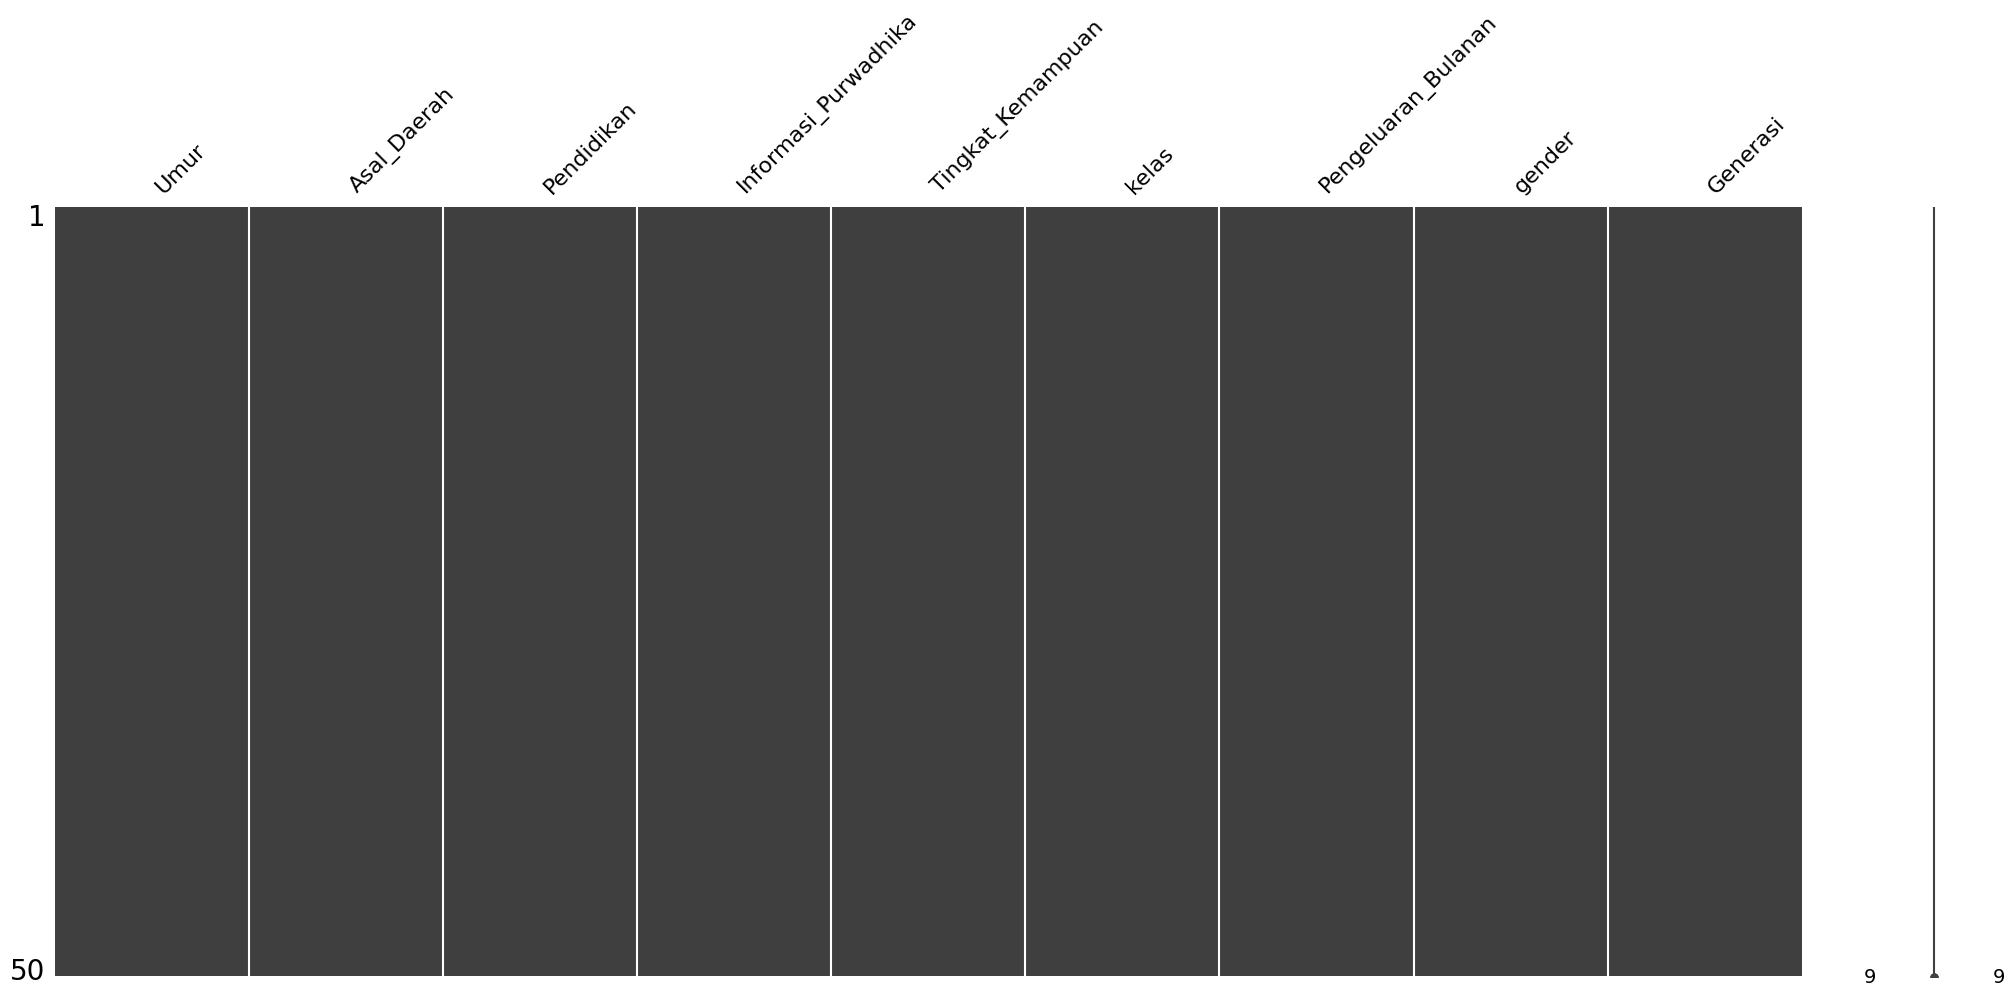

In [ ]:
import missingno as msno
msno.matrix(df)

In [ ]:
##melihat semua data yang kosong
df[df.isna().any(axis = 1)]

,Umur,Asal_Daerah,Pendidikan,Informasi_Purwadhika,Tingkat_Kemampuan,kelas,Pengeluaran_Bulanan,gender,Generasi


KESIMPULAN:

setelah melakukan pengecekan pada data tersebut tidak terdapat missing values sehingga tidak ada data yang kosong

##DATA  DUPLIKAT

In [ ]:
# jumlah duplikat
df.duplicated().sum()

0

In [ ]:
#lihat yang duplikat
df[df.duplicated()]

,Umur,Asal_Daerah,Pendidikan,Informasi_Purwadhika,Tingkat_Kemampuan,kelas,Pengeluaran_Bulanan,gender,Generasi


KESIMPULAN:

pada data ini pun tidak terdapa data yang duplikat

## VARIABEL NUMERIK

###Statistika Deskriptif

In [ ]:
df.describe()

,Umur,Tingkat_Kemampuan,Pengeluaran_Bulanan
count,50.000000,50.000000,5.000000e+01
mean,27.120000,2.020000,1.414000e+06
std,4.378239,0.820403,2.864348e+05
min,20.000000,1.000000,8.000000e+05
25%,24.000000,1.000000,1.225000e+06
50%,27.000000,2.000000,1.400000e+06
75%,30.000000,3.000000,1.600000e+06
max,39.000000,3.000000,2.000000e+06


###grafik histogram

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

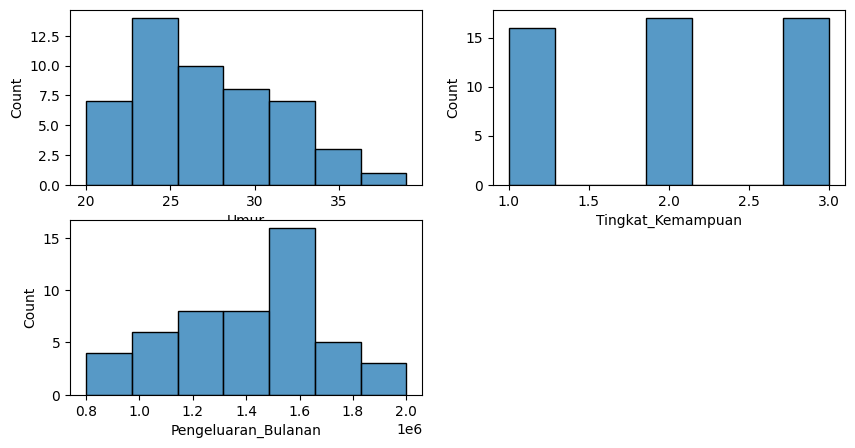

In [ ]:
# ambil kolom yang numerik
numerik = df.select_dtypes(include = 'number') # float dan int

plt.figure(figsize = (10,5)) # (kolom, bairs)
posisi = 1
for kolom in numerik.columns:
    plt.subplot(2, 2, posisi) # (baris, kolom, posisi)
    sns.histplot(df[kolom])
    posisi += 1

# mengeprint grafik
plt.show()

### Uji statistika

####Kolmogorov Smirnov

In [ ]:
from scipy.stats import kstest

for kolom in numerik.columns:
    stat, pval = kstest(df[kolom],'norm')
    if pval < 0.05:
        print(f'Distribusi {kolom} tidak normal (Tolak H0)')
    else:
        print(f'Distribusi {kolom} normal (Terima H0)')

Distribusi Umur tidak normal (Tolak H0)
Distribusi Tingkat_Kemampuan tidak normal (Tolak H0)
Distribusi Pengeluaran_Bulanan tidak normal (Tolak H0)


#### Liliefors Test

In [ ]:
from statsmodels.stats.diagnostic import lilliefors

for kolom in numerik.columns:
    stat, pval = lilliefors(df[kolom])
    if pval < 0.05:
        print(f'Distribusi {kolom} tidak normal (Tolak H0)')
    else:
        print(f'Distribusi {kolom} normal (Terima H0)')

Distribusi Umur normal (Terima H0)
Distribusi Tingkat_Kemampuan tidak normal (Tolak H0)
Distribusi Pengeluaran_Bulanan normal (Terima H0)


####Shapiro Wilk

In [ ]:
# Shapiro Wilk
from scipy.stats import shapiro

stat, pval = shapiro(df[kolom])
if pval < 0.05:
    print('Distribusi tidak normal (Tolak H0)')
else:
    print('Distribusi normal (Terima H0)')

Distribusi normal (Terima H0)


#### D'Agustino Pearson

In [ ]:
# D'Agustino Pearson
from scipy.stats import normaltest

for kolom in numerik.columns:
    stat, pval = normaltest(df[kolom])
    if pval < 0.05:
        print(f'Distribusi {kolom} tidak normal (Tolak H0)')
    else:
        print(f'Distribusi {kolom} normal (Terima H0)')

Distribusi Umur normal (Terima H0)
Distribusi Tingkat_Kemampuan tidak normal (Tolak H0)
Distribusi Pengeluaran_Bulanan normal (Terima H0)


###Outliers

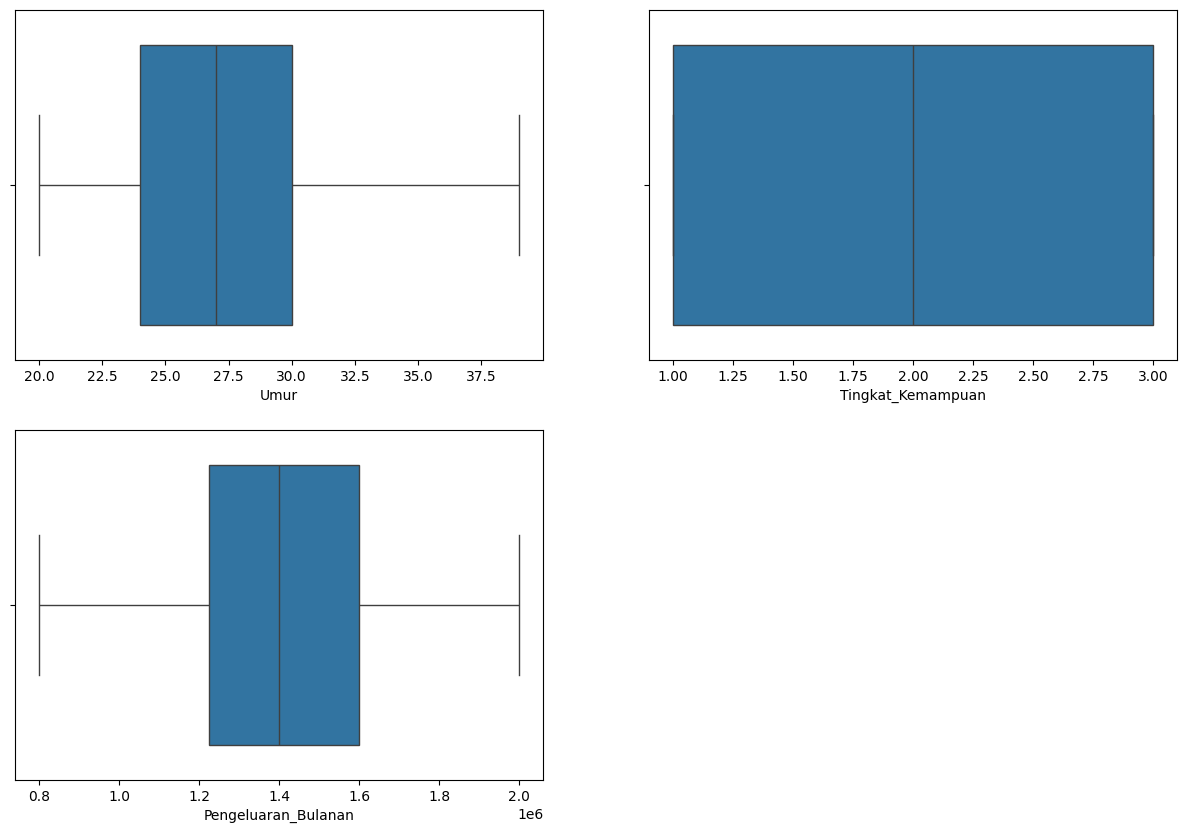

In [ ]:
# ambil kolom yang numerik
numerik = df.select_dtypes(include = 'number') # float dan int

plt.figure(figsize = (15,10)) # (kolom, bairs)
posisi = 1
for kolom in numerik.columns:
    plt.subplot(2, 2, posisi) # (baris, kolom, posisi)
    sns.boxplot(x = df[kolom])
    posisi += 1

# mengeprint grafik
plt.show()

####IQR

In [ ]:
# ambil numerik saja
numerik = df.select_dtypes(include = 'number')
list_jumlah_outliers = []
for kolom in numerik.columns:
    q3 = numerik.describe().loc['75%', kolom]
    q1 = numerik.describe().loc['25%', kolom]
    iqr = q3 - q1
    whis = 1.5 * iqr
    batas_atas = q3 + whis
    batas_bawah = q1 - whis

    # jumlah outliers
    jumlah_outliers = len(df[(df[kolom]>batas_atas) | (df[kolom]<batas_bawah)])
    list_jumlah_outliers.append(jumlah_outliers)

pd.DataFrame({
                'kolom': numerik.columns,
                'jumlah_outliers': list_jumlah_outliers
})

,kolom,jumlah_outliers
0,Umur,0
1,Tingkat_Kemampuan,0
2,Pengeluaran_Bulanan,0


### korelasi

#### Pearson

<Axes: >

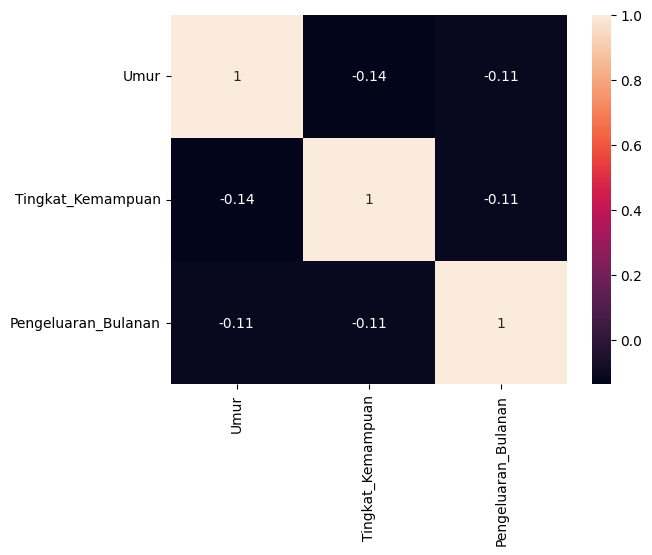

In [ ]:
sns.heatmap(numerik.corr(method = 'pearson'), annot = True)

#### Spearmen

<Axes: >

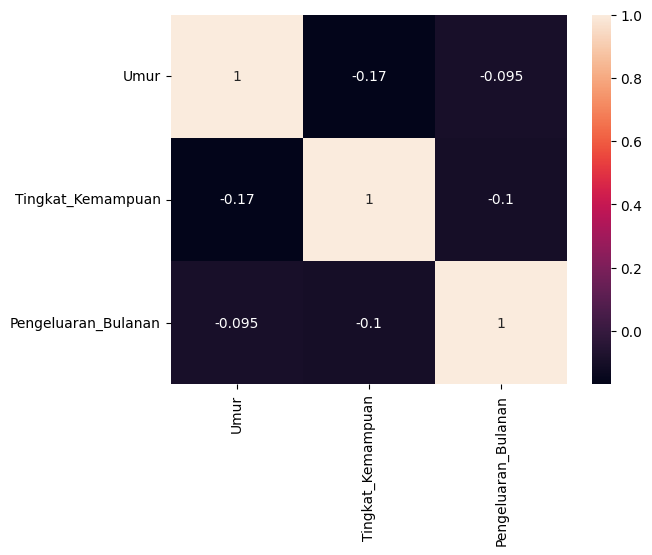

In [ ]:
sns.heatmap(numerik.corr(method = 'spearman'), annot = True, )

####Pairplot

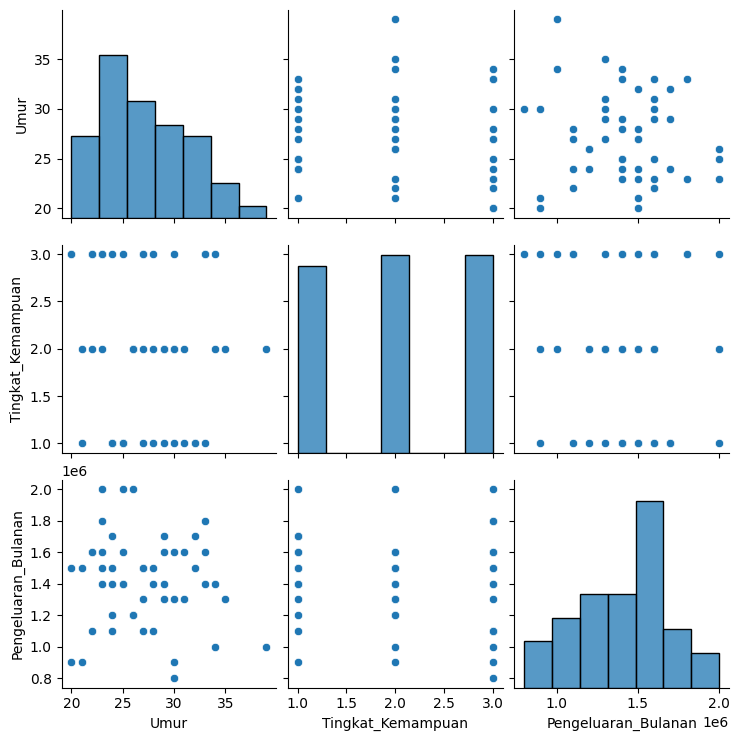

In [ ]:
sns.pairplot(numerik)

## Variabel Kategorik

###Statiska Deskriptif

In [ ]:
# df.describe(include = 'object') # sama saja
df.describe(exclude = 'number')

,Asal_Daerah,Pendidikan,Informasi_Purwadhika,kelas,gender,Generasi
count,50,50,50,50,50,50
unique,7,2,5,2,2,2
top,Jawa Tengah,S1,Instagram,DM,Pria,Gen Z
freq,16,46,19,30,45,28


###Unique Values

In [ ]:
# ambil semua yg kategorik
kategorik = df.select_dtypes(include = 'object')

# hitung unique values masing2 variabel
kategorik.nunique()

,0
Asal_Daerah,7
Pendidikan,2
Informasi_Purwadhika,5
kelas,2
gender,2
Generasi,2


###Value Counts

In [ ]:
df['Asal_Daerah'].value_counts()

,count
Asal_Daerah,
Jawa Tengah,16
Yogyakarta,11
Jawa Barat,11
Bali,5
Papua,3
Sumatera Barat,3
Jawa Timur,1


In [ ]:
df['Pendidikan'].value_counts()

,count
Pendidikan,
S1,46
SMA,4


In [ ]:
df['Informasi_Purwadhika'].value_counts()

,count
Informasi_Purwadhika,
Instagram,19
Teman,13
Lainnya,10
LinkedIn,6
Twitter,2


In [ ]:
df['kelas'].value_counts()

,count
kelas,
DM,30
WD,20


In [ ]:
df['gender'].value_counts()

,count
gender,
Pria,45
Wanita,5


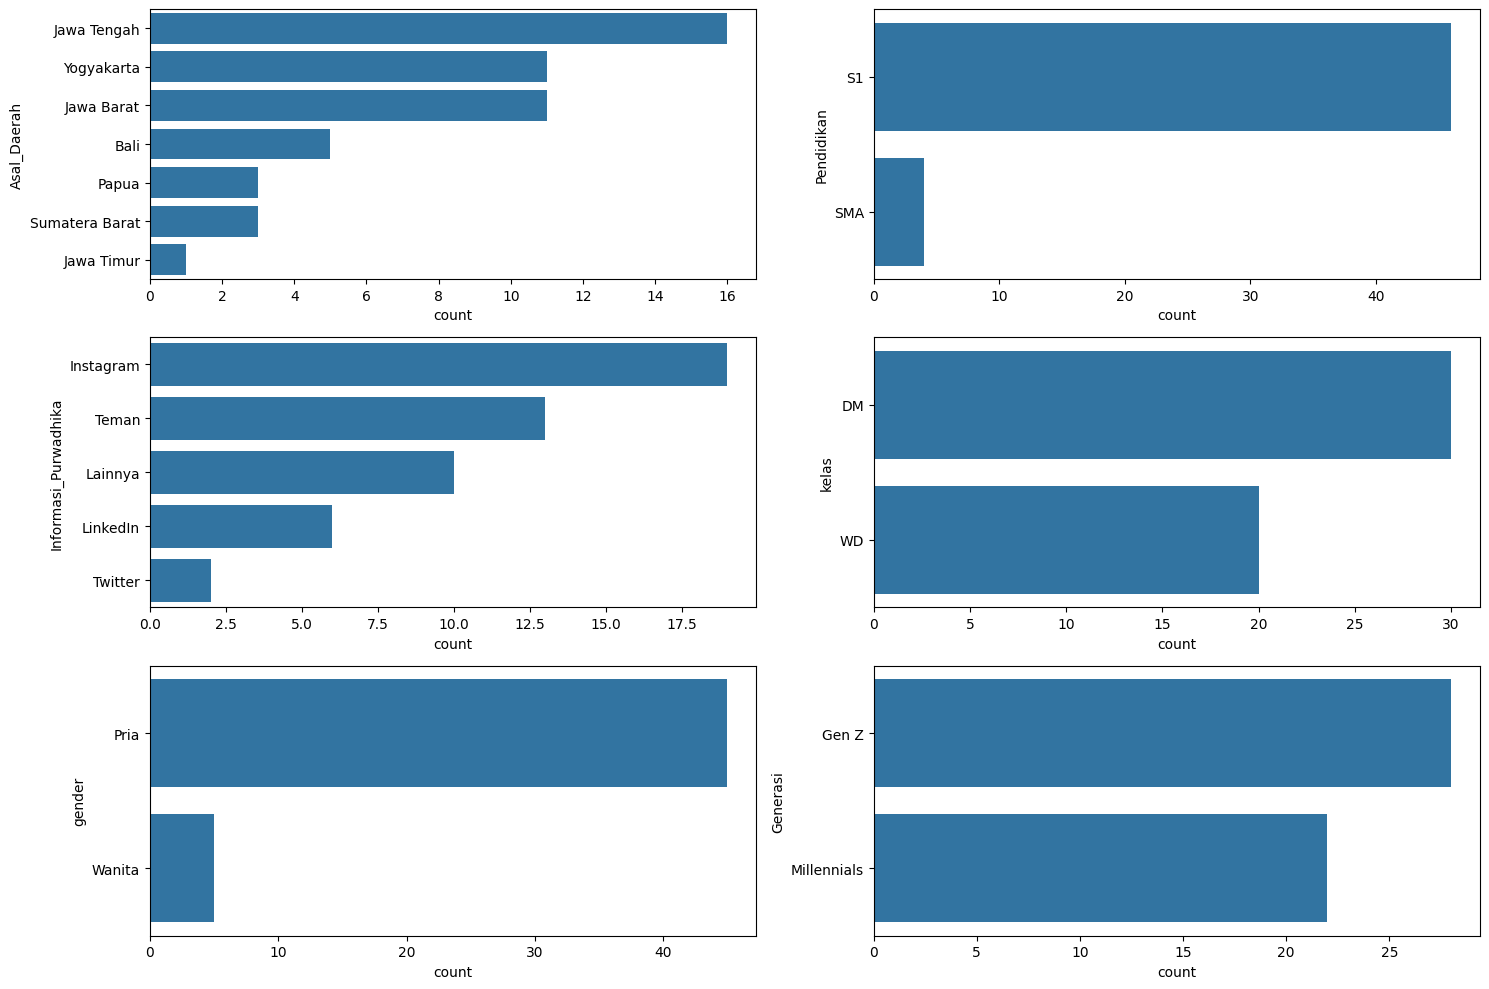

In [ ]:
plt.figure(figsize = (15,10)) # (kolom, bairs)
posisi = 1
for kolom in kategorik.columns:
    plt.subplot(3, 2, posisi) # (baris, kolom, posisi)
    sns.barplot(df[kolom].value_counts().sort_values(ascending = False).head(10), orient = 'h')
    posisi += 1
    plt.tight_layout() # biar tidak bertabrakan

# mengeprint grafik
plt.show()

In [ ]:
!pip install pandas-profiling

In [ ]:
!pip install --upgrade numba

In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport

ProfileReport(df, title="Profiling Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# EDA dan UJI STATISTIKA

##KATRGORIK & KATEGORIK

###GENERASI

<Axes: xlabel='Generasi', ylabel='count'>

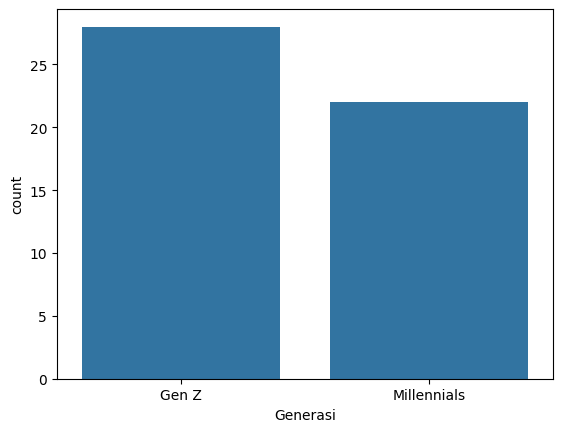

In [ ]:
sns.countplot(x = 'Generasi', data = df)

<Axes: ylabel='count'>

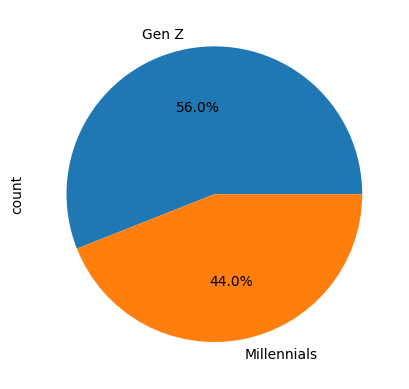

In [ ]:
df['Generasi'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')

###GENERASI & ASAL DAERAH

<Axes: xlabel='Generasi'>

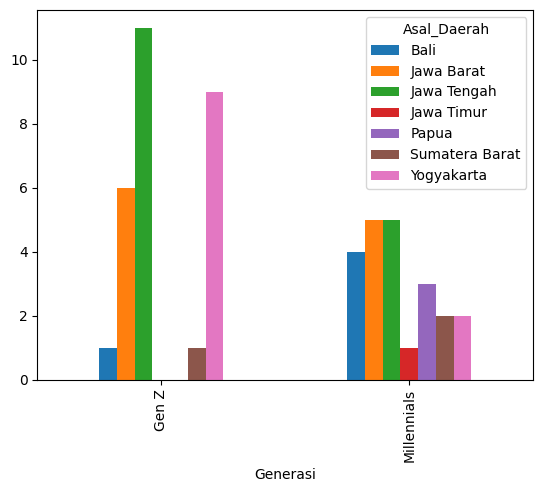

In [ ]:
pd.crosstab(index = df['Generasi'], columns = df['Asal_Daerah']).plot(kind = 'bar')

In [ ]:
pd.crosstab(index = df['Generasi'], columns = df['Asal_Daerah'])

Asal_Daerah,Bali,Jawa Barat,Jawa Tengah,Jawa Timur,Papua,Sumatera Barat,Yogyakarta
Generasi,,,,,,,
Gen Z,1,6,11,0,0,1,9
Millennials,4,5,5,1,3,2,2


<Figure size 2500x2000 with 0 Axes>

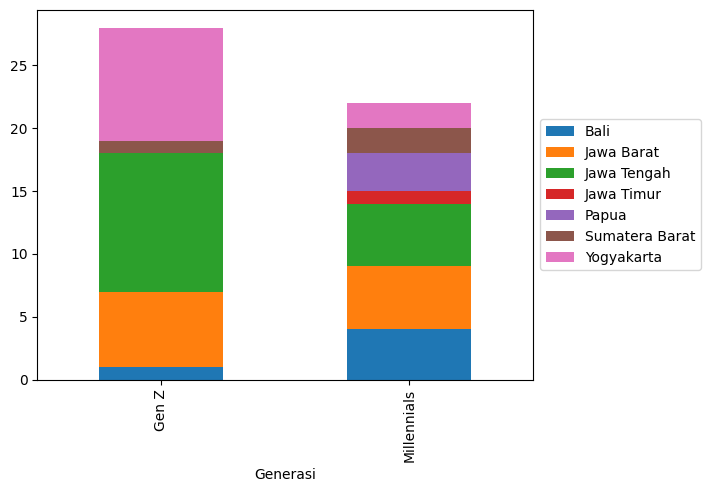

In [ ]:
plt.figure(figsize = (25,20)) # (kolom, bairs

pd.crosstab(index = df['Generasi'], columns = df['Asal_Daerah']).plot(kind = 'bar', stacked=True)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [ ]:
pd.pivot_table(data = df[['Asal_Daerah']], index = df['Generasi'], columns = df['Asal_Daerah'], aggfunc = 'count')

Asal_Daerah                                          \
Asal_Daerah        Bali Jawa Barat Jawa Tengah Jawa Timur Papua   
Generasi                                                          
Gen Z               1.0        6.0        11.0        NaN   NaN   
Millennials         4.0        5.0         5.0        1.0   3.0   

                                       
Asal_Daerah Sumatera Barat Yogyakarta  
Generasi                               
Gen Z                  1.0        9.0  
Millennials            2.0        2.0

#### Statistik Generasi & Asal Daerah

In [ ]:
from scipy.stats import chi2_contingency

H0 = "proporsi generasi tidak berpengaruh signifikan terhadap asal daerah"
Ha = "proporsi generasi berpengaruh signifikan terhadap asal daerah"
stat, pval, dof, ef = chi2_contingency(df.pivot_table(index = 'Generasi', columns = 'Asal_Daerah', aggfunc = 'size'))
if pval < 0.05:
    print(f'H0 ditolak sehingga {Ha}')
else:
    print(f'H0 diterima sehingga {H0}')

H0 diterima sehingga proporsi generasi tidak berpengaruh signifikan terhadap asal daerah


###GENERASI & PENDIDIKAN

In [ ]:
pd.crosstab(index = df['Generasi'], columns = df['Pendidikan'])

Pendidikan,S1,SMA
Generasi,,
Gen Z,25,3
Millennials,21,1


<Axes: xlabel='Generasi'>

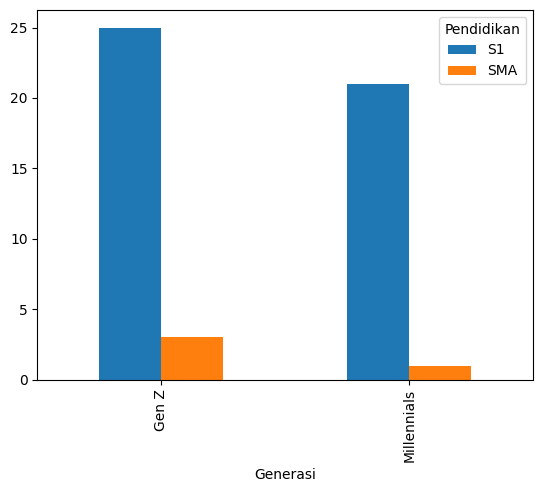

In [ ]:
pd.crosstab(index = df['Generasi'], columns = df['Pendidikan']).plot(kind='bar')

#### Statistik Generasi & Pendidikan

In [ ]:
jumlah_S1_genz = len(df[(df['Generasi']=='Gen Z') & (df['Pendidikan']=='S1')])
jumlah_genz = len(df[df['Generasi']=='Gen Z'])

jumlah_S1_mill =  len(df[(df['Generasi']=='Millennials') & (df['Pendidikan']=='S1')])
jumlah_mill = len(df[df['Generasi']=='Millennials'])

H0 = "proporsi generasi tidak berpengaruh signifikan terhadap pendidikan"
Ha = "proporsi generasi berpengaruh signifikan terhadap pendidikan"

stat, pval = proportions_ztest(
                    [jumlah_S1_genz, jumlah_S1_mill], # proprosi good untuk setiap kelompok
                    [jumlah_genz, jumlah_mill] # total data untuk setiap kelompok
)

print(f'stat: {stat}')
print(f'pval: {pval}')
if pval < 0.05:
    print(f'H0 ditolak sehingga {Ha}')
else:
    print(f'H0 diterima sehingga {H0}')

stat: -0.7981220900930652
pval: 0.42479964349816046
H0 diterima sehingga proporsi generasi tidak berpengaruh signifikan terhadap pendidikan


###GENERASI & INFORMASI PURWADHIKA

In [ ]:
pd.crosstab(index = df['Generasi'], columns = df['Informasi_Purwadhika'])

Informasi_Purwadhika,Instagram,Lainnya,LinkedIn,Teman,Twitter
Generasi,,,,,
Gen Z,10,4,4,9,1
Millennials,9,6,2,4,1


<Axes: xlabel='Generasi'>

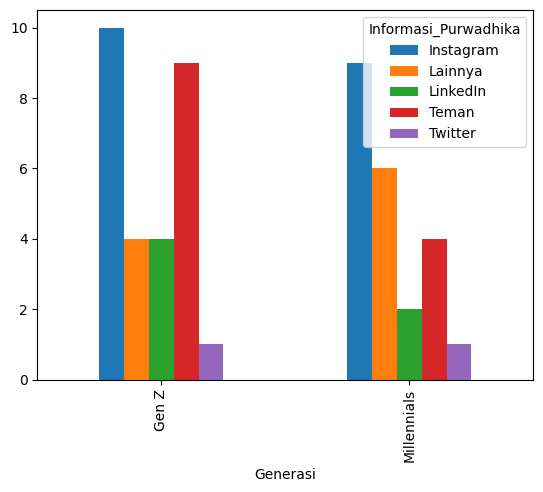

In [ ]:
pd.crosstab(index = df['Generasi'], columns = df['Informasi_Purwadhika']).plot(kind='bar')

#### Statistika Generasi & Informasi Purwadhika

In [ ]:
H0 = "proporsi generasi tidak berpemgaruh terhadap informasi purwadhika"
Ha = "proporsi generasi berpengaruh signifikan terhadap informasi purwadhika"
stat, pval, dof, ef = chi2_contingency(df.pivot_table(index = 'Generasi', columns = 'Informasi_Purwadhika', aggfunc = 'size'))
if pval < 0.05:
    print(f'H0 ditolak sehingga {Ha}')
else:
    print(f'H0 diterima sehingga {H0}')

H0 diterima sehingga proporsi generasi tidak berpemgaruh terhadap informasi purwadhika


###GENERASI & TINGKAT KEMAMPUAN

In [ ]:
pd.crosstab(index = df['Generasi'], columns = df['Tingkat_Kemampuan'])

Tingkat_Kemampuan,1,2,3
Generasi,,,
Gen Z,9,7,12
Millennials,7,10,5


<Axes: xlabel='Generasi'>

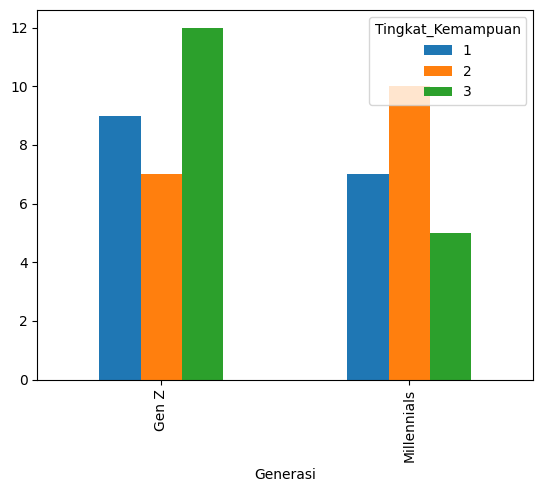

In [ ]:
pd.crosstab(index = df['Generasi'], columns = df['Tingkat_Kemampuan']).plot(kind='bar')

#### Statistika Generasi & Tingkat Kemampuan

In [ ]:
H0 = "proporsi generasi tidak berpemgaruh terhadap tingkat kemampuan"
Ha = "proporsi generasi berpengaruh signifikan terhadap tingkat kemampuan"
stat, pval, dof, ef = chi2_contingency(df.pivot_table(index = 'Generasi', columns = 'Tingkat_Kemampuan', aggfunc = 'size'))
if pval < 0.05:
    print(f'H0 ditolak sehingga {Ha}')
else:
    print(f'H0 diterima sehingga {H0}')

H0 diterima sehingga proporsi generasi tidak berpemgaruh terhadap tingkat kemampuan


###GENERASI & KELAS

In [ ]:
pd.crosstab(index = df['Generasi'], columns = df['kelas'])

kelas,DM,WD
Generasi,,
Gen Z,16,12
Millennials,14,8


Tabel Persentase DM dan WD di Setiap Generasi dan Kelas:


kelas,DM,WD,Persentase DM,Persentase WD
Generasi,,,,
Gen Z,16,12,57.142857,42.857143
Millennials,14,8,63.636364,36.363636


<Figure size 1500x1200 with 0 Axes>

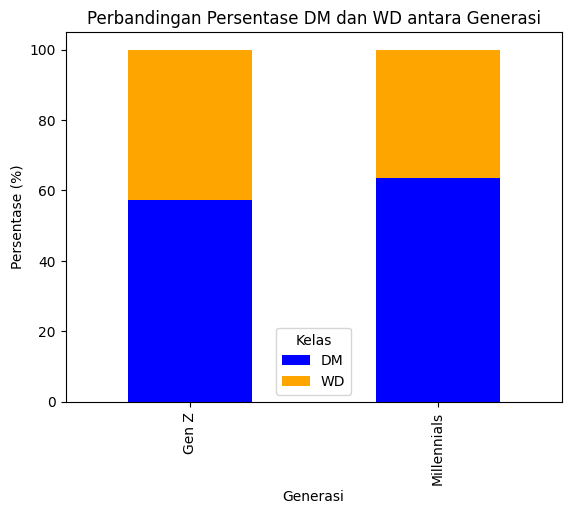

In [ ]:
# Menghitung banyaknya DM dan WD per Generasi dan Kelas
generasi_kelas = df.groupby(['Generasi', 'kelas']).size().unstack(fill_value=0)

# Menghitung persentase DM dan WD di setiap generasi
generasi_kelas['Persentase DM'] = generasi_kelas['DM'] / (generasi_kelas['DM'] + generasi_kelas['WD']) * 100
generasi_kelas['Persentase WD'] = generasi_kelas['WD'] / (generasi_kelas['DM'] + generasi_kelas['WD']) * 100

# Menampilkan tabel persentase
print("Tabel Persentase DM dan WD di Setiap Generasi dan Kelas:")
display(generasi_kelas)

# Visualisasi stacked bar plot untuk Persentase DM dan WD per Generasi
plt.figure(figsize=(15, 12))

# Plot Persentase DM dan WD sebagai stacked bar
generasi_kelas[['Persentase DM', 'Persentase WD']].plot(kind='bar', stacked=True, color=['blue', 'orange'])

# Menambahkan label dan judul
plt.title('Perbandingan Persentase DM dan WD antara Generasi')
plt.xlabel('Generasi')
plt.ylabel('Persentase (%)')
plt.legend(title='Kelas', labels=['DM', 'WD'])

# Menampilkan plot
plt.show()

#### Statistika Generasi & Kelas

In [ ]:
jumlah_DM_genz = len(df[(df['Generasi']=='Gen Z') & (df['kelas']=='DM')])
jumlah_genz = len(df[df['Generasi']=='Gen Z'])

jumlah_DM_mill =  len(df[(df['Generasi']=='Millennials') & (df['kelas']=='DM')])
jumlah_mill = len(df[df['Generasi']=='Millennials'])

H0 = "proporsi generasi tidak berpengaruh signifikan terhadap pemilihan kelas"
Ha = "proporsi generasi berpengaruh signifikan terhadap pemilihan kelas"

stat, pval = proportions_ztest(
                    [jumlah_DM_genz, jumlah_DM_mill], # proprosi good untuk setiap kelompok
                    [jumlah_genz, jumlah_mill] # total data untuk setiap kelompok
)

print(f'stat: {stat}')
print(f'pval: {pval}')
if pval < 0.05:
    print(f'H0 ditolak sehingga {Ha}')
else:
    print(f'H0 diterima sehingga {H0}')

stat: -0.46524210519923564
pval: 0.6417580893423201
H0 diterima sehingga proporsi generasi tidak berpengaruh signifikan terhadap pemilihan kelas


###GENERASI & GENDER

In [ ]:
pd.crosstab(index = df['Generasi'], columns = df['gender'])

gender,Pria,Wanita
Generasi,,
Gen Z,26,2
Millennials,19,3


<Axes: xlabel='Generasi'>

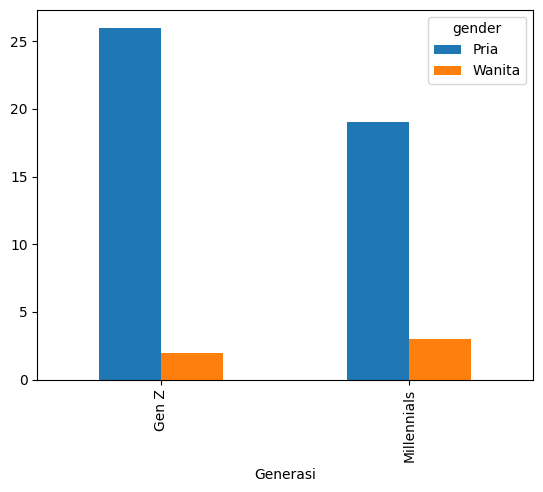

In [ ]:
pd.crosstab(index = df['Generasi'], columns = df['gender']).plot(kind='bar')

#### Statistika Generasi & Gender

In [ ]:
# Import library yang dibutuhkan
from statsmodels.stats.proportion import proportions_ztest

# Hitung jumlah Gen Z dan Millennials
jumlah_genz = len(df[df['Generasi'] == 'Gen Z'])
jumlah_mill = len(df[df['Generasi'] == 'Millennials'])

# Hitung jumlah pria di Gen Z dan Millennials
jumlah_pria_genz = len(df[(df['Generasi'] == 'Gen Z') & (df['gender'] == 'Pria')])
jumlah_pria_mill = len(df[(df['Generasi'] == 'Millennials') & (df['gender'] == 'Pria')])

# Tetapkan hipotesis
H0 = "Proporsi gender tidak berbeda signifikan antara generasi"
Ha = "Proporsi gender berbeda signifikan antara generasi"

# Lakukan uji proporsi dua sampel
stat, pval = proportions_ztest(
    [jumlah_pria_genz, jumlah_pria_mill],  # Proporsi pria untuk setiap generasi
    [jumlah_genz, jumlah_mill]  # Total data untuk setiap generasi
)

# Cetak hasil uji
print(f'stat: {stat}')
print(f'pval: {pval}')

# Ambil kesimpulan
if pval < 0.05:
    print(f'H0 ditolak sehingga {Ha}')
else:
    print(f'H0 diterima sehingga {H0}')

stat: 0.7597371763975866
pval: 0.44741170200931835
H0 diterima sehingga Proporsi gender tidak berbeda signifikan antara generasi


## Presentasi Kategorik

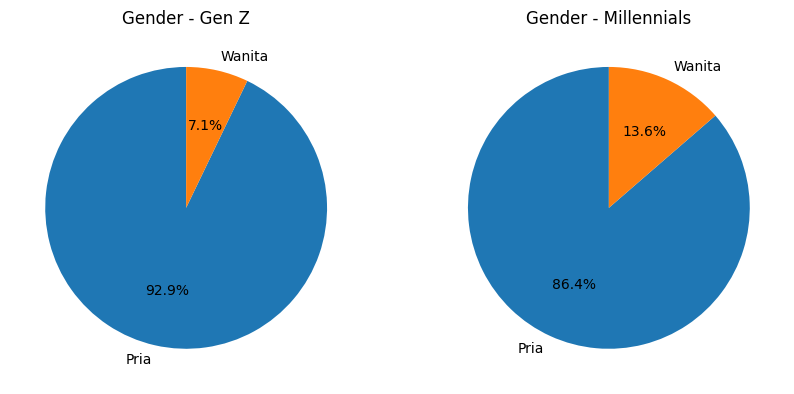

In [ ]:
# Filter data untuk Gen Z dan Millennials
genz_data = df[df['Generasi'] == 'Gen Z']
millennials_data = df[df['Generasi'] == 'Millennials']

# Hitung proporsi gender untuk setiap generasi
genz_gender_counts = genz_data['gender'].value_counts()
millennials_gender_counts = millennials_data['gender'].value_counts()
# Buat figure dan axes untuk dua pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart untuk Gen Z
ax1.pie(genz_gender_counts, labels=genz_gender_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Gender - Gen Z')

# Pie chart untuk Millennials
ax2.pie(millennials_gender_counts, labels=millennials_gender_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Gender - Millennials')

# Tampilkan plot
plt.show()

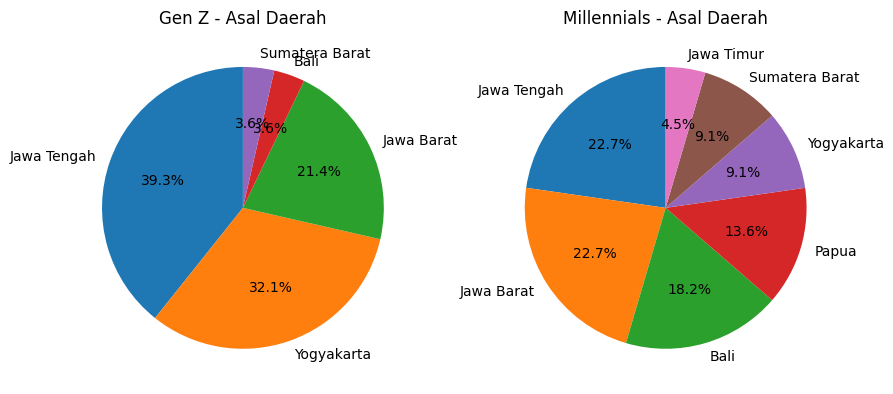

In [ ]:
# Hitung proporsi asal daerah untuk setiap generasi
genz_asal_counts = genz_data['Asal_Daerah'].value_counts()
millennials_asal_counts = millennials_data['Asal_Daerah'].value_counts()
# Buat figure dan axes untuk dua pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart untuk Gen Z
ax1.pie(genz_asal_counts, labels=genz_asal_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Gen Z - Asal Daerah')

# Pie chart untuk Millennials
ax2.pie(millennials_asal_counts, labels=millennials_asal_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Millennials - Asal Daerah')

# Tampilkan plot
plt.show()

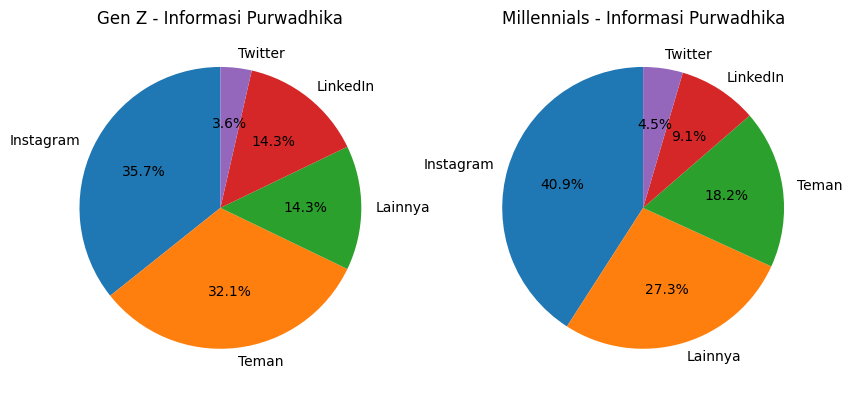

In [ ]:
# Hitung proporsi informasi purwadhika untuk setiap generasi
genz_info_counts = genz_data['Informasi_Purwadhika'].value_counts()
millennials_info_counts = millennials_data['Informasi_Purwadhika'].value_counts()
# Buat figure dan axes untuk dua pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart untuk Gen Z
ax1.pie(genz_info_counts, labels=genz_info_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Gen Z - Informasi Purwadhika')

# Pie chart untuk Millennials
ax2.pie(millennials_info_counts, labels=millennials_info_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Millennials - Informasi Purwadhika')

# Tampilkan plot
plt.show()

## KATEGORIK DAN NUMERIK

## GENERASI & PENGELUARAN BULANAN

In [ ]:
df['Generasi'].value_counts()

,count
Generasi,
Gen Z,28
Millennials,22


In [ ]:
pengeluaran_generasi = df.groupby('Generasi')['Pengeluaran_Bulanan'].mean()

pengeluaran_generasi

,Pengeluaran_Bulanan
Generasi,
Gen Z,1.446429e+06
Millennials,1.372727e+06


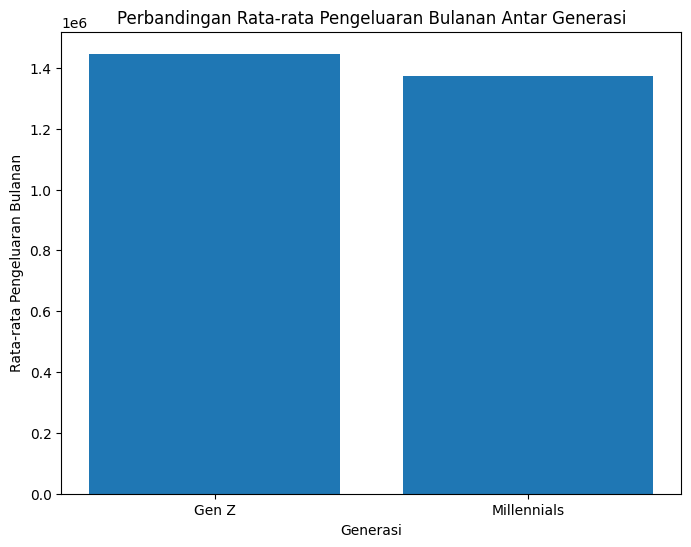

In [ ]:
plt.figure(figsize=(8, 6))  # Atur ukuran figure jika diperlukan
plt.bar(pengeluaran_generasi.index, pengeluaran_generasi.values)
plt.title('Perbandingan Rata-rata Pengeluaran Bulanan Antar Generasi')
plt.xlabel('Generasi')
plt.ylabel('Rata-rata Pengeluaran Bulanan')
plt.show()

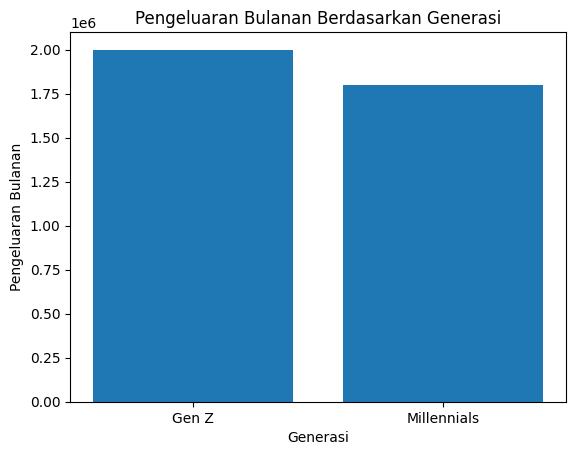

In [ ]:
plt.bar(df['Generasi'], df['Pengeluaran_Bulanan'])
plt.title('Pengeluaran Bulanan Berdasarkan Generasi')
plt.xlabel('Generasi')
plt.ylabel('Pengeluaran Bulanan')
plt.show()

#### Statistika Generasi & Pengeluaran Bulanan

In [ ]:
from scipy.stats import ttest_ind

H0 = "Rata-rata pengeluaran bulanan tidak berbeda antara generasi"
Ha = "Rata-rata pengeluaran bulanan berbeda antara generasi"

stat, pval = ttest_ind(df[df['Generasi'] == 'Gen Z']['Pengeluaran_Bulanan'],
                       df[df['Generasi'] == 'Millennials']['Pengeluaran_Bulanan'])

if pval < 0.05:
    print(f'H0 ditolak sehingga {Ha}')
else:
    print(f'H0 diterima sehingga {H0}')

H0 diterima sehingga Rata-rata pengeluaran bulanan tidak berbeda antara generasi


# KESIMPULAN STATISTIK

Variabel usia tidak memengaruhi variabel lainnya.